# Ultimate Technologies Inc

# Part 1 - Exploratory Data Analysis

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
from datetime import datetime, timedelta
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the first file
with open('logins.json', 'r') as file:
    logins_data = json.load(file)

# Data Preprocessing

In [3]:
# checking the data 
if isinstance(logins_data, dict) and 'login_time' in logins_data:
    login_times = logins_data['login_time']


    df_logins = pd.DataFrame({'login_time': login_times})


    df_logins['login_time'] = pd.to_datetime(df_logins['login_time'], errors='coerce')


    df_logins.dropna(inplace=True)
else:
    print("Data is not in the expected format or does not contain the key 'login_time'")

# Data Aggregation

In [4]:
# grouping the login times into 15-minute intervals
df_logins.set_index('login_time', inplace=True)
df_logins['count'] = 1
df_logins_15min = df_logins.resample('15T').sum()

In [5]:
df_logins_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


# Data Visualization

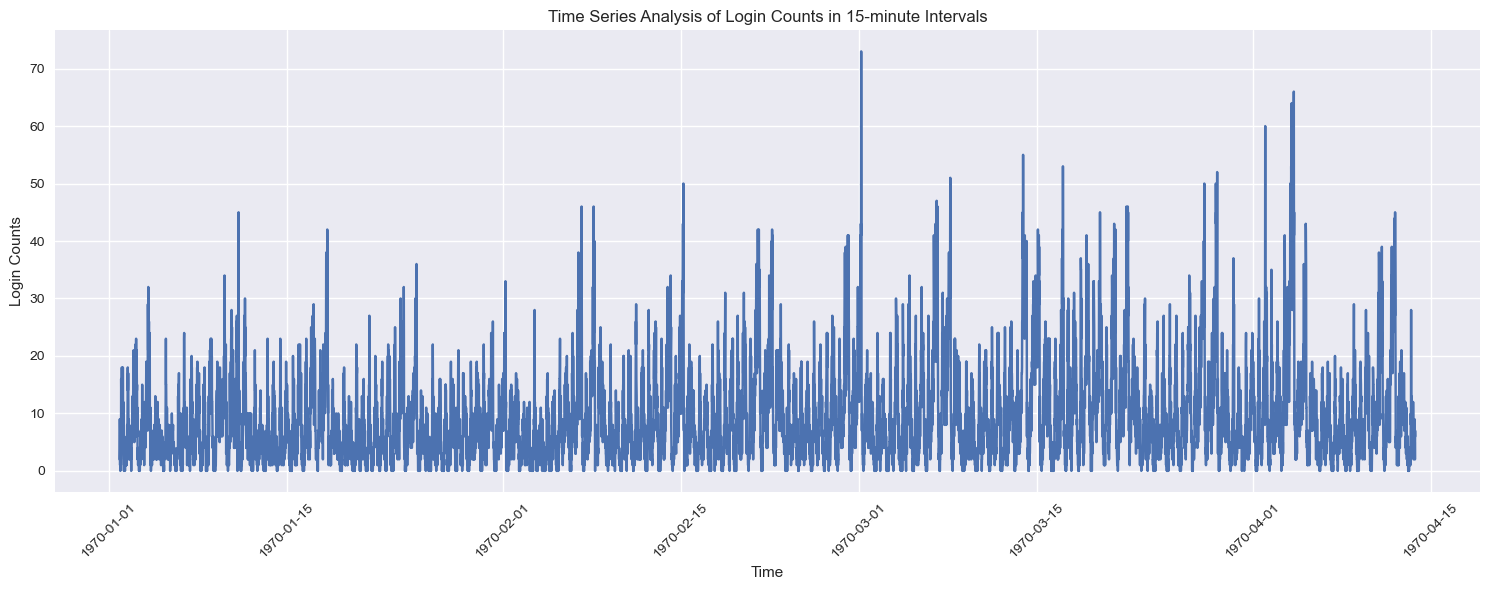

In [6]:
# time series of login counts
plt.figure(figsize=(15, 6))
sns.lineplot(x=df_logins_15min.index, y='count', data=df_logins_15min)
plt.title('Time Series Analysis of Login Counts in 15-minute Intervals')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('1.1.png', bbox_inches='tight') 
plt.show()

# Data Quality Assessment

In [7]:
# missing values and duplicates
missing_values = df_logins.isna().sum()
duplicate_entries = df_logins.duplicated().sum()

# descriptive statistics
descriptive_stats = df_logins.describe()

# data quality summary
print("Missing Values:\n", missing_values)
print("Duplicate Entries:", duplicate_entries)
print("Descriptive Statistics:\n", descriptive_stats)

Missing Values:
 count    0
dtype: int64
Duplicate Entries: 93141
Descriptive Statistics:
          count
count  93142.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0


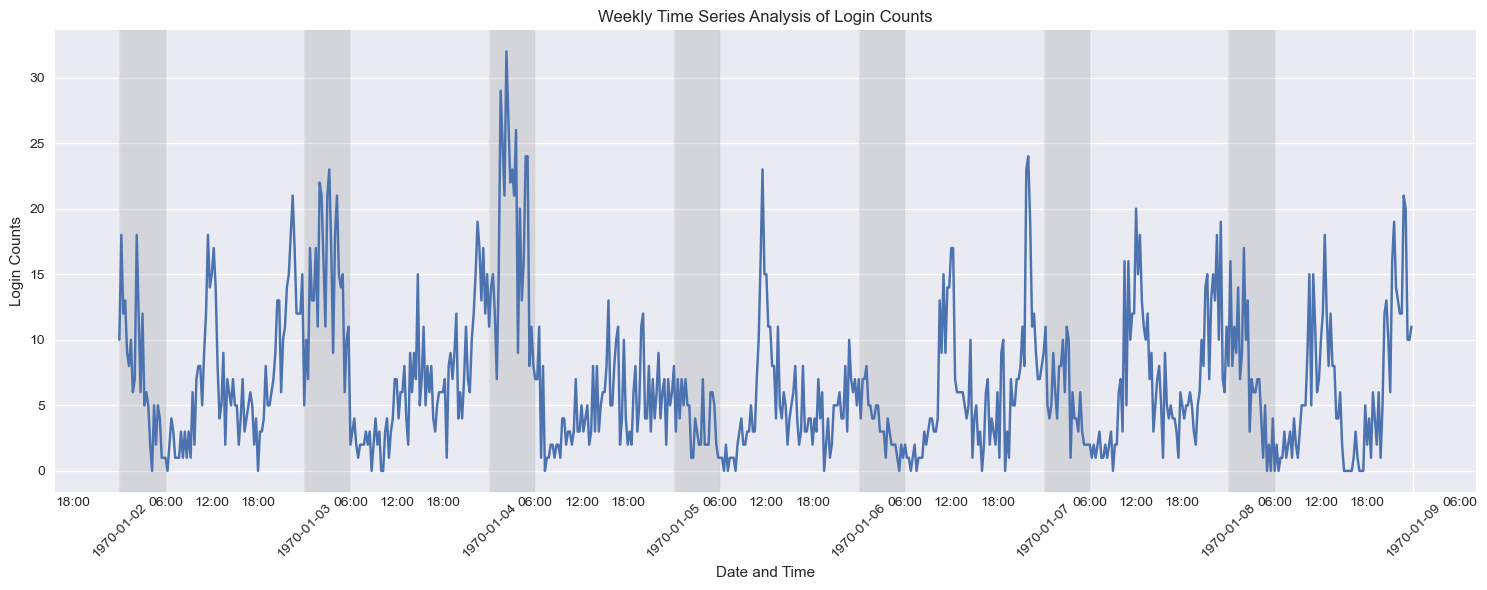

,count
login_time,
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
1970-01-06,536
1970-01-07,648
1970-01-08,625


In [8]:
import matplotlib.dates as mdates

# representative week for detailed analysis
start_date = '1970-01-02'
end_date = '1970-01-08'
df_week = df_logins_15min[start_date:end_date]

# time series of login counts for the selected week
plt.figure(figsize=(15, 6))
sns.lineplot(x=df_week.index, y='count', data=df_week)

# labels
plt.title('Weekly Time Series Analysis of Login Counts')
plt.xlabel('Date and Time')
plt.ylabel('Login Counts')
plt.xticks(rotation=45)

# x-axis 
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

# highlighting nights (00:00 to 06:00) to observe nighttime activity
for day in pd.date_range(start=start_date, end=end_date, freq='D'):
    plt.axvspan(day, day + pd.Timedelta(hours=6), color='grey', alpha=0.2)

plt.tight_layout()
plt.savefig('1.2.png', bbox_inches='tight') 
plt.show()

daily_summary = df_week.resample('D').sum()
daily_summary

# Part 2 ‐ Experiment and metrics design (included in the report)

# Part 3 ‐ Predictive modeling

In [9]:
# load the secod file
with open('ultimate_data_challenge.json', 'r') as file:
    data = json.load(file)
df = pd.DataFrame(data)    

In [10]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


# Data Cleaning and Exploratory Analysis:

In [12]:
# missing values
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [13]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [14]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [15]:
unique_city = df['city'].unique()
unique_phone = df['phone'].unique()
unique_ultimate_black_user = df['ultimate_black_user'].unique()

unique_city, unique_phone, unique_ultimate_black_user

(array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object),
 array(['iPhone', 'Android', None], dtype=object),
 array([ True, False]))

## Data Cleaning Steps

In [16]:
# converting 'signup_date' and 'last_trip_date' to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [17]:
# replacing missing values in 'avg_rating_of_driver' and 'avg_rating_by_driver' with the median
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(), inplace=True)

In [18]:
# replacing missing values in 'phone' with the mode
phone_mode = df['phone'].mode()[0]
df['phone'].fillna(phone_mode, inplace=True)

In [19]:
cleaned_missing_values = df.isnull().sum()

cleaned_missing_values

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [20]:
# numeric variables
numeric_distribution = df.describe()

numeric_distribution

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.650038,1.074764,8.849536,60.926084,5.796827,4.779050
std,3.792684,0.575601,0.222336,19.958811,37.081503,5.707357,0.445974
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [21]:
# categorical variables
city_distribution = df['city'].value_counts()
phone_distribution = df['phone'].value_counts()
ultimate_black_user_distribution = df['ultimate_black_user'].value_counts()

city_distribution, phone_distribution, ultimate_black_user_distribution

(Winterfell        23336
 Astapor           16534
 King's Landing    10130
 Name: city, dtype: int64,
 iPhone     34978
 Android    15022
 Name: phone, dtype: int64,
 False    31146
 True     18854
 Name: ultimate_black_user, dtype: int64)

# Fraction of Observed Users Retained:

In [22]:
# most recent trip date in the dataset
most_recent_trip_date = df['last_trip_date'].max()

# defining the cutoff date for being considered retained (30 days before the most recent trip date)
cutoff_date = most_recent_trip_date - pd.Timedelta(days=30)

# identifying users who were active in the preceding 30 days
df['retained'] = df['last_trip_date'] > cutoff_date

# fraction of users retained
fraction_retained = df['retained'].mean()
fraction_retained

0.3662

Based on the provided data, the fraction of observed users who were retained (i.e., users who were "active" in the preceding 30 days from the most recent trip date in the dataset) is approximately 36.62%. This means that about 36.62% of the users in the dataset were active in the 30 days preceding the last recorded trip date.

# Building a Predictive Model:

## Define the Target Variable

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# difference in months between 'signup_date' and 'last_trip_date'
df['months_since_signup'] = (df['last_trip_date'].dt.year - df['signup_date'].dt.year) * 12 + (df['last_trip_date'].dt.month - df['signup_date'].dt.month)

# target variable => users active in their 6th month
df['active_6th_month'] = df['months_since_signup'] == 5

## Feature Selection and Data Preprocessing

In [24]:
# Select features
features = df[['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']]
target = df['active_6th_month']

# Encoding categorical variables
label_encoder = LabelEncoder()
features['city'] = label_encoder.fit_transform(features['city'])
features['phone'] = label_encoder.fit_transform(features['phone'])
features['ultimate_black_user'] = label_encoder.fit_transform(features['ultimate_black_user'])

# Feature scaling
scaler = StandardScaler()
features = scaler.fit_transform(features)

## Splitting the Dataset

In [25]:
# training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

## Model Training

In [26]:
# RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Prediction and Evaluation

In [27]:
# predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7427333333333334
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.80      0.80      9522
        True       0.65      0.64      0.64      5478

    accuracy                           0.74     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.74      0.74      0.74     15000



Accuracy: Approximately 74.27%
Precision, Recall, and F1-Score:
For users not active in the 6th month (False): Precision is 0.79, Recall is 0.80, and F1-score is 0.80.
For users active in the 6th month (True): Precision is 0.65, Recall is 0.64, and F1-score is 0.64.


The model performs reasonably well in identifying users who will not be active in their 6th month, as indicated by the higher precision and recall for the 'False' class.
The performance for predicting users who will be active (True class) is lower, suggesting the model may struggle more with correctly identifying these cases.